## TP 3 : Détection de communautés dans les réseaux sociaux

##### Réalisé par :
- Guechtouli Anis
- Hammamid Ahmed Issam

### Exercice 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G = nx.DiGraph()

edges = [
    (1, 2, 2), (1, 3, 5),
    (2, 3, 2), (2, 6, 4),
    (3, 4, 3), (3, 5, 6),
    (4, 7, 2), (4, 5, 1),
    (5, 8, 4), (6, 7, 4),
    (6, 8, 7), (6, 4, 1),
    (7, 8, 2)
]
G.add_weighted_edges_from(edges, weight="capacity")

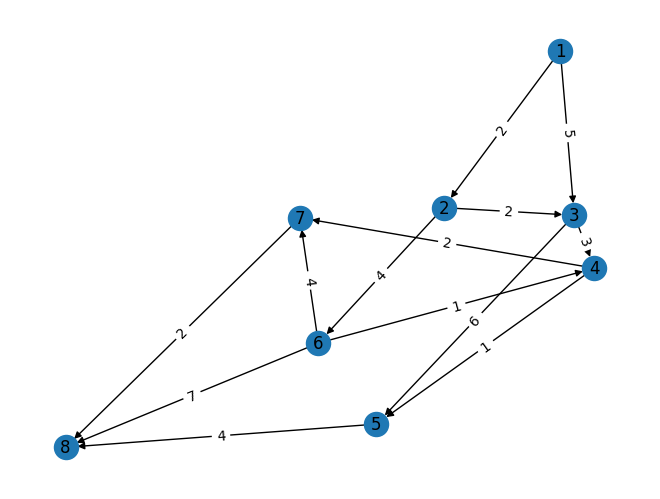

In [3]:
# show the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [4]:
def cut_value(G, VS, VP):

    cut_val = 0
    for u in VS:
        for v in G.successors(u):
            if v in VP:
                cut_val += G[u][v]["capacity"]
    return cut_val

In [5]:
# Example cuts
partitions = [
    ({1, 2, 3}, {4, 5, 6, 7, 8}),
    ({1, 2,3,4,5}, { 6, 7, 8}),
    ({1, 2,3, 4,5, 6, 7},{8})
]

print("Three example cuts:\n")
for VS, VP in partitions:
    value = cut_value(G, VS, VP)
    print(f"Cut: \nVS={VS}, VP={VP}, Value={value}")

Three example cuts:

Cut: 
VS={1, 2, 3}, VP={4, 5, 6, 7, 8}, Value=13
Cut: 
VS={1, 2, 3, 4, 5}, VP={8, 6, 7}, Value=10
Cut: 
VS={1, 2, 3, 4, 5, 6, 7}, VP={8}, Value=13


In [6]:
source = 1
target = 8
cut_value, partition = nx.minimum_cut(G, source, target, capacity="capacity")

VS, VP = partition
print("Minimum cut:")
print(f"Cut value: {cut_value}")
print(f"Partition:\nVS={VS}, VP={VP}")

Minimum cut:
Cut value: 7
Partition:
VS={1}, VP={2, 3, 4, 5, 6, 7, 8}


### Exercice 2

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
graph_2 = nx.Graph()

sommets = [i for i in range(1, 22)]

graph_2.add_nodes_from(sommets)

In [9]:
aretes = [(1,4),(2,5),(2,6),(3,4),(3,7),(4,5),(5,6),
          (5,15),(5,8),(6,14),(7,10),(7,11),(7,12),
          (8,9),(8,13),(9,13),(10,11),(10,12),(11,12),
          (12,13),(13,16),(14,15),(15,17),(15,19),(15,20),
          (16,17),(16,20),(16,21),(18,19),(19,20),(19,21)]

graph_2.add_edges_from(aretes)

In [10]:
# Définition des clusters
cluster_1 = {1, 2, 3, 4, 5, 6}
cluster_2 = {7, 8, 9, 10, 11, 12, 13}
cluster_3 = {14, 15, 16, 17, 18, 19, 20, 21}

# Définition des positions pour chaque cluster
base_positions = {
    1: (-5, 0),  # cluster 1
    2: (0, 5),   # cluster 2
    3: (5, 0)    # cluster 3
}

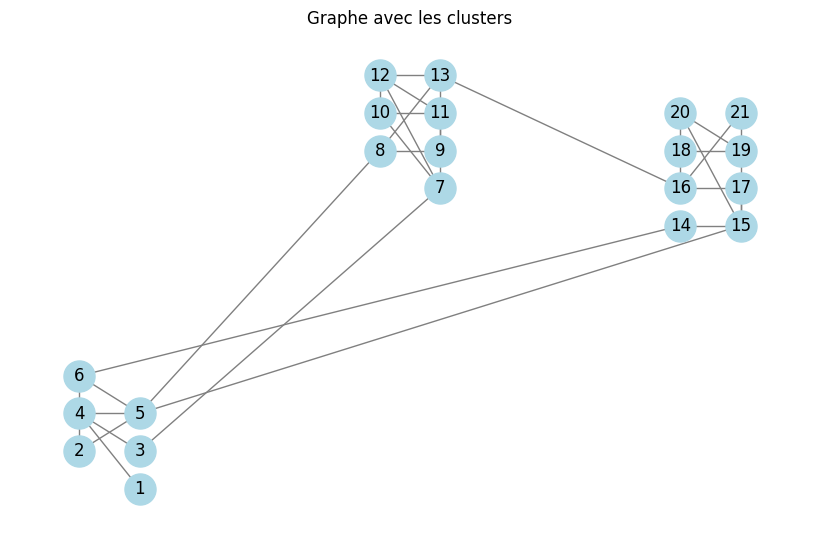

In [11]:
pos = {}

# Calcul des positions pour les noeuds du cluster 1
for node in cluster_1:
    pos[node] = (base_positions[1][0] + (node % 2), base_positions[1][1] + (node // 2))

for node in cluster_2:
    pos[node] = (base_positions[2][0] + (node % 2), base_positions[2][1] + (node // 2))

for node in cluster_3:
    pos[node] = (base_positions[3][0] + (node % 2), base_positions[3][1] + (node // 2))

plt.figure(figsize=(8, 5))
nx.draw(graph_2,
        pos,
        with_labels=True,
        node_color="lightblue",
        node_size=500,
        edge_color="gray")
plt.title("Graphe avec les clusters")
plt.show()

In [12]:
# Fonction pour calculer la modularité d'un graphe en fonction de ses clusters
def modularité(G, clusters):
    m = len(G.edges())
    results = []

    for idx, cluster in enumerate(clusters, 1):
        # arêtes intra cluster
        intra_cluster = [edge for edge in G.edges() if edge[0] in cluster and edge[1] in cluster]
        i = len(intra_cluster)

        # degrés des noeuds dans le cluster
        node_degrees = {node: 0 for node in cluster}
        for edge in G.edges():
            for node in edge:
                if node in cluster:
                    node_degrees[node] += 1
        d = sum(node_degrees.values())

        # Calcul des composantes de la modularité
        I = i / m               # proportion des arêtes intra cluster par rapport au total
        D = (d / (2 * m)) ** 2  # Carré de la somme des degrés normalisée

        # Calcul de la modularité
        Q = I - D

        results.append([f'Cluster {idx}', i, d, I, D, Q])

    df = pd.DataFrame(results, columns=["cluster", "I", "d", "I/m",
                                        "(d/2m)^2", "Modularité"])
    return df

In [13]:
clusters = [cluster_1, cluster_2, cluster_3]
modularity_df = modularité(graph_2, clusters)
modularity_df

,cluster,I,d,I/m,(d/2m)^2,Modularité
0,Cluster 1,6,16,0.193548,0.066597,0.126951
1,Cluster 2,10,23,0.322581,0.137617,0.184964
2,Cluster 3,10,23,0.322581,0.137617,0.184964


In [14]:
print(f"La modularité du clustering est : {modularity_df['Modularité'].sum():.4f}")

La modularité du clustering est : 0.4969


In [15]:
print(f"La meilleure modularité est de : {modularity_df["Modularité"].max():.4f}")

La meilleure modularité est de : 0.1850


### Exercice 3

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
points = np.array([(-4, 2),(-7, 4),(-6, 5), (-5, -2),
                   (-7, -6),(7, 8), (8, 10),(2, -6),  (8, -5), (0, 5),
                   (2, 7), (3, 0), (2, -1), (2, -2),(4, 3), (2, 2)])

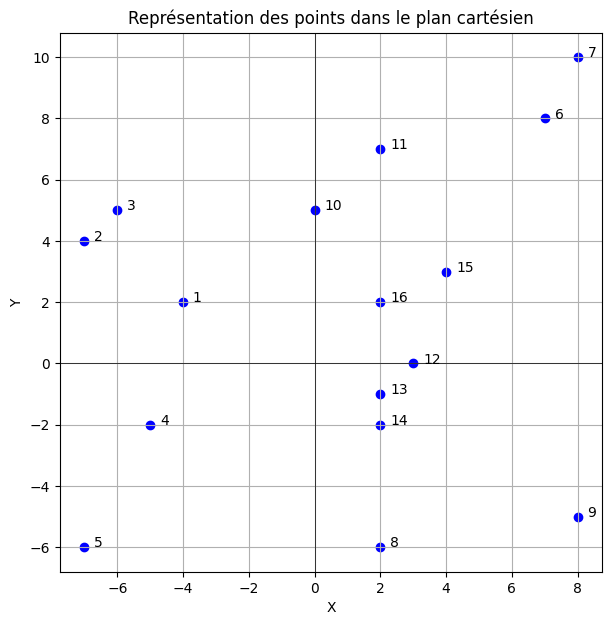

In [25]:
# visualisation
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], color='blue')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.3, y, str(i + 1), fontsize=10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title("Représentation des points dans le plan cartésien")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [26]:
# Calcul des distances Euclidiennes entre les points en utilisant la fonction pdist et squareform
dist_matrix = squareform(pdist(points, metric='euclidean'))

dist_df = pd.DataFrame(dist_matrix, 
                    index=[f"Point {i+1}" for i in range(len(points))],
                    columns=[f"Point {i+1}" for i in range(len(points))])

print("Matrice des distances Euclidiennes :")
dist_df.round(2)

Matrice des distances Euclidiennes :


,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,Point 11,Point 12,Point 13,Point 14,Point 15,Point 16
Point 1,0.00,3.61,3.61,4.12,8.54,12.53,14.42,10.00,13.89,5.00,7.81,7.28,6.71,7.21,8.06,6.00
Point 2,3.61,0.00,1.41,6.32,10.00,14.56,16.16,13.45,17.49,7.07,9.49,10.77,10.30,10.82,11.05,9.22
Point 3,3.61,1.41,0.00,7.07,11.05,13.34,14.87,13.60,17.20,6.00,8.25,10.30,10.00,10.63,10.20,8.54
Point 4,4.12,6.32,7.07,0.00,4.47,15.62,17.69,8.06,13.34,8.60,11.40,8.25,7.07,7.00,10.30,8.06
Point 5,8.54,10.00,11.05,4.47,0.00,19.80,21.93,9.00,15.03,13.04,15.81,11.66,10.30,9.85,14.21,12.04
Point 6,12.53,14.56,13.34,15.62,19.80,0.00,2.24,14.87,13.04,7.62,5.10,8.94,10.30,11.18,5.83,7.81
Point 7,14.42,16.16,14.87,17.69,21.93,2.24,0.00,17.09,15.00,9.43,6.71,11.18,12.53,13.42,8.06,10.00
Point 8,10.00,13.45,13.60,8.06,9.00,14.87,17.09,0.00,6.08,11.18,13.00,6.08,5.00,4.00,9.22,8.00
Point 9,13.89,17.49,17.20,13.34,15.03,13.04,15.00,6.08,0.00,12.81,13.42,7.07,7.21,6.71,8.94,9.22
Point 10,5.00,7.07,6.00,8.60,13.04,7.62,9.43,11.18,12.81,0.00,2.83,5.83,6.32,7.28,4.47,3.61


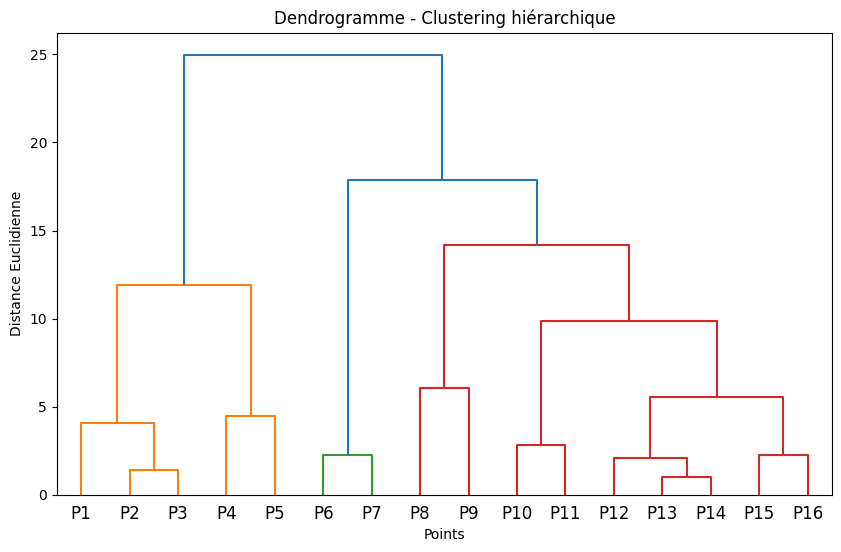

In [27]:
# méthode de linkage
linkage_matrix = linkage(points, method='ward')

# dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=[f"P{i+1}" for i in range(len(points))])
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Points")
plt.ylabel("Distance Euclidienne")
plt.show()

In [28]:
# Découper le dendrogramme en deux clusters principaux
clusters = fcluster(linkage_matrix, 2, criterion='maxclust')

cluster_1 = points[clusters == 1]
cluster_2 = points[clusters == 2]
print(f"Cluster 1 :\n{cluster_1}")
print(f"\nCluster 2 :\n{cluster_2}")

Cluster 1 :
[[-4  2]
 [-7  4]
 [-6  5]
 [-5 -2]
 [-7 -6]]

Cluster 2 :
[[ 7  8]
 [ 8 10]
 [ 2 -6]
 [ 8 -5]
 [ 0  5]
 [ 2  7]
 [ 3  0]
 [ 2 -1]
 [ 2 -2]
 [ 4  3]
 [ 2  2]]


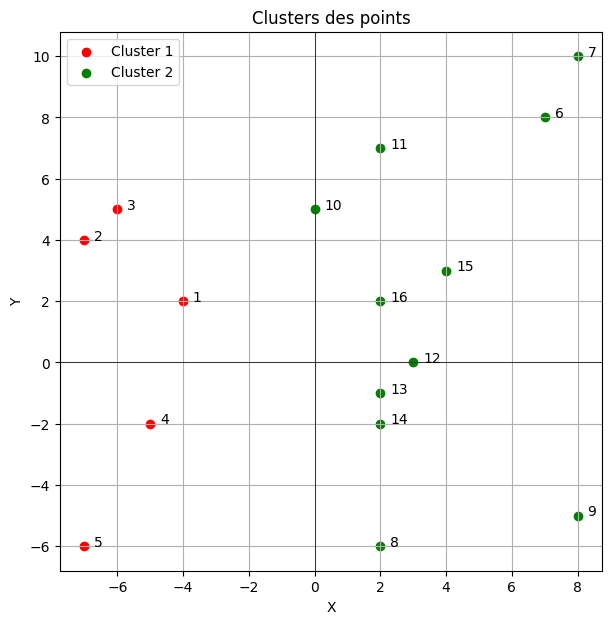

In [29]:
# Visualisation des clusters
plt.figure(figsize=(7, 7))
plt.scatter(cluster_1[:, 0],
            cluster_1[:, 1],color='red',
            label='Cluster 1')

plt.scatter(cluster_2[:, 0],
            cluster_2[:, 1],
            color='green',
            label='Cluster 2')

for i, (x, y) in enumerate(points):
    plt.text(x + 0.3, y, str(i + 1), fontsize=10)

plt.axhline(0,
            color='black',
            linewidth=0.5)
plt.axvline(0,
            color='black',
            linewidth=0.5)
plt.grid()
plt.title("Clusters des points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()